In [1]:
# jaccard_similarity.py

import pandas as pd
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# 1. Load cleaned CSV file (titles already cleaned)
csv_path = r"C:\Users\tered\Desktop\recommender_system\data\processed\books_titles_clean.csv"
df = pd.read_csv(csv_path)

# Optional: check how many titles are loaded
print(f"Total books loaded: {len(df)}")

Total books loaded: 6810


In [3]:
# 2. Tokenize the title column (lowercase, remove punctuation, split into words)
df["tokens"] = df["title"].str.lower().str.replace(r"[^a-z0-9 ]", "", regex=True).str.split()

In [4]:
# 3. Convert token sets into a binary matrix (multi-hot encoding)
mlb = MultiLabelBinarizer()
binary_matrix = mlb.fit_transform(df["tokens"])

In [5]:
# 4. Compute Jaccard similarity (1 - Jaccard distance)
jaccard_distances = pairwise_distances(binary_matrix, metric="jaccard")
jaccard_similarity = 1 - jaccard_distances

# 5. Save similarity matrix to CSV
output_dir = r"C:\Users\tered\Desktop\recommender_system\experiments\01_baseline_jaccard"
os.makedirs(output_dir, exist_ok=True)
pd.DataFrame(jaccard_similarity).to_csv(os.path.join(output_dir, "results.csv"), index=False)

c:\Users\tered\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


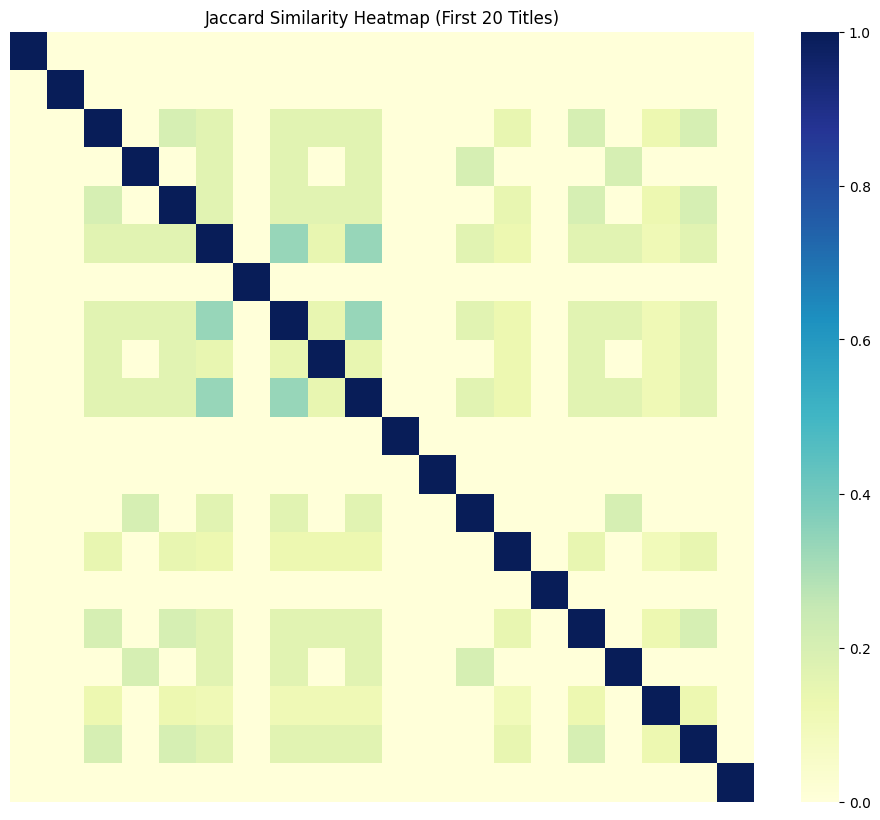

In [6]:
# 6. Plot similarity heatmap for the first 20 titles
plt.figure(figsize=(12, 10))
sns.heatmap(jaccard_similarity[:20, :20], cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Jaccard Similarity Heatmap (First 20 Titles)")
plot_path = os.path.join(output_dir, "plots")
os.makedirs(plot_path, exist_ok=True)
plt.savefig(os.path.join(plot_path, "jaccard_heatmap.png"))
plt.show()